### Question 3

<u> Part a </u>:
Let us write a custum function that computes the power function for all the combinations of the values in $\Lambda$ and $K$.

In [1]:
using Distributions

In [2]:
"""
In function π(Λ,K,R), Λ is a vector of values for the noncentrality parameter, 
K is a vector of values for the number of degrees of freedon, and 
R is the number of MC repetitions. 
The custom function computes the power function for all the combinations of the values in Λ and K

"""

function π(Λ,K,R)
    # dimensions
    n_l = length(Λ)
    n_k = length(K)
    m = maximum(K)
    
    # matrix to store results
    P = zeros(n_l,n_k)
    
    # standard normal variables
    Z = randn(R,m)
    
    # critical values
    cv=quantile.(Chisq.(K),0.95)
    
    for i=1:n_l
        for j=1:n_k
            X=(Z[:,1].+ Λ[i]).^2 + sum((Z[:,2:K[j]]).^2,dims=2)
            P[i,j] = sum((X .> cv[j]))/R
        end
    end

return P
end

π (generic function with 1 method)

<u> Part b </u>:

In [3]:
Λ=[0.0:0.1:6.0;]
K=[1;5;10];

Π=π(Λ,K,10^5)

61×3 Matrix{Float64}:
 0.05072  0.05052  0.04963
 0.05173  0.05078  0.04995
 0.05523  0.05162  0.05086
 0.06047  0.05336  0.0523
 0.06916  0.05634  0.05456
 0.07914  0.06027  0.05742
 0.09234  0.06515  0.06094
 0.10793  0.07146  0.06484
 0.1268   0.07863  0.06968
 0.147    0.08692  0.0752
 0.17084  0.09701  0.082
 0.19642  0.10893  0.08939
 0.22494  0.12155  0.09821
 ⋮                 
 0.99826  0.98033  0.94606
 0.99873  0.98418  0.95557
 0.99907  0.98781  0.9633
 0.99932  0.99028  0.97011
 0.99953  0.99251  0.97558
 0.9997   0.99405  0.97998
 0.99979  0.99548  0.98397
 0.99984  0.99669  0.98717
 0.99989  0.99756  0.98981
 0.99993  0.99817  0.99212
 0.99996  0.99866  0.99399
 0.99998  0.99907  0.99535

We can observe that when the non-centrality parameter is very close to zero, the test power goes to 0.05. Which is what we expected

<u> Part c </u>:

In [4]:
using Plots, LaTeXStrings


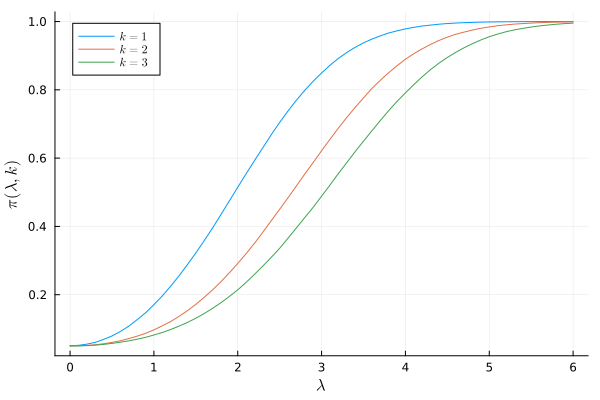

In [5]:
plot(Λ,Π[:,1],label = L"k=1")
plot!(Λ,Π[:,2],label=L"k=2")
plot!(Λ,Π[:,3],label=L"k=3",legend=:topleft)
plot!(xlabel=L"\lambda",ylabel=L"\pi(\lambda,k)")

<u> Part d </u>:


We can see that the power of the test deceases with the number of degree of freedom